In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using LinearAlgebra
using StatsPlots
using StatsBase
using Distances
using SPI

In [2]:
pdir = plotsdir("supp02_18x9data")
mkpath(pdir)

"/Users/ben/projects/Doran_etal_2022/plots/supp02_18x9data"

In [3]:
heatmapcols = [:purple, :black, :yellow];
generationcols = ["#B3D2FC" "#2B689E" "#338591"];

In [4]:
M = Float64.([
    1 0 1 0 0 0 1 0 1;
    0 1 1 0 0 0 1 0 1;
    1 1 0 0 0 0 1 0 1;
    1 0 1 0 0 0 0 1 1;
    0 1 1 0 0 0 0 1 1;
    1 1 0 0 0 0 0 1 1;
    1 0 1 0 0 0 1 1 0;
    0 1 1 0 0 0 1 1 0;
    1 1 0 0 0 0 1 1 0;
    1 0 1 1 0 1 0 0 0;
    0 1 1 1 0 1 0 0 0;
    1 1 0 1 0 1 0 0 0;
    1 0 1 0 1 1 0 0 0;
    0 1 1 0 1 1 0 0 0;
    1 1 0 0 1 1 0 0 0;
    1 0 1 1 1 0 0 0 0;
    0 1 1 1 1 0 0 0 0;
    1 1 0 1 1 0 0 0 0;
]);

In [5]:
usv = svd(M);

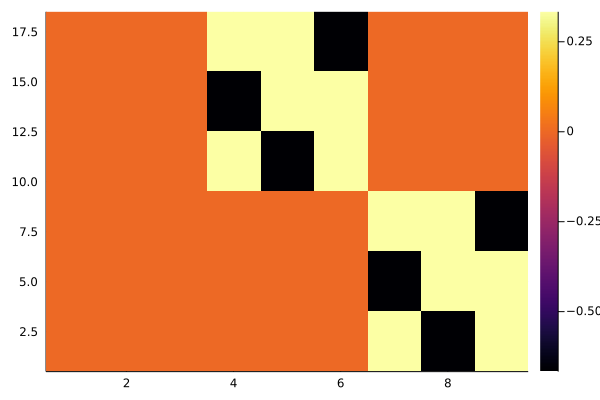

In [12]:
heatmap(projectout(usv, 5:8))

In [14]:
round.(projectout(usv, 5:8), digits=4)

18×9 Matrix{Float64}:
  0.0   0.0  -0.0  -0.0     -0.0      0.0      0.3333  -0.6667   0.3333
  0.0   0.0  -0.0   0.0     -0.0      0.0      0.3333  -0.6667   0.3333
  0.0   0.0  -0.0  -0.0      0.0     -0.0      0.3333  -0.6667   0.3333
 -0.0  -0.0   0.0  -0.0     -0.0      0.0     -0.6667   0.3333   0.3333
 -0.0  -0.0   0.0  -0.0      0.0      0.0     -0.6667   0.3333   0.3333
 -0.0  -0.0   0.0  -0.0      0.0     -0.0     -0.6667   0.3333   0.3333
 -0.0  -0.0  -0.0   0.0     -0.0      0.0      0.3333   0.3333  -0.6667
 -0.0  -0.0  -0.0   0.0      0.0      0.0      0.3333   0.3333  -0.6667
 -0.0  -0.0  -0.0   0.0     -0.0     -0.0      0.3333   0.3333  -0.6667
 -0.0  -0.0  -0.0   0.3333  -0.6667   0.3333   0.0     -0.0      0.0
 -0.0  -0.0  -0.0   0.3333  -0.6667   0.3333  -0.0      0.0      0.0
 -0.0  -0.0  -0.0   0.3333  -0.6667   0.3333   0.0     -0.0      0.0
  0.0  -0.0   0.0  -0.6667   0.3333   0.3333   0.0      0.0     -0.0
  0.0  -0.0   0.0  -0.6667   0.3333   0.3333  -0.0    

In [6]:
S = diagm(usv.S)
S[S.==0.0] .= NaN;

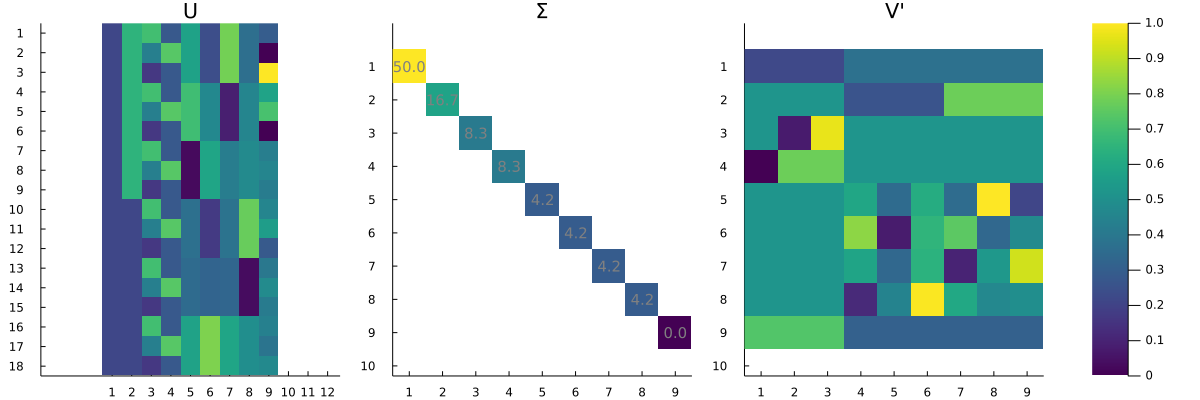

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [7]:
l = @layout [a b c d{0.1w}]
plot(layout=l, size=(1200, 400), ratio=1, ticks=1:18, yflip=true, grid=false, colorbar=:none)
heatmap!(usv.U, c=:viridis, sp=1, title="U")
heatmap!(S, c=:viridis, sp=2, title="Σ")
fracvar = round.((usv.S.^2)/sum(usv.S.^2)*100, digits=1);
annotate!(1:9, 1:9, text.(string.(fracvar), 10, :grey),  sp=2)
heatmap!(usv.Vt, c=:viridis, sp=3, title="V'")
plot!([0], line_z=[0,1], c=:viridis, ratio=:auto, colorbar=true, frame=:none, label="", sp=4)

In [8]:
savefig(joinpath(pdir, "SVDdecomp_of_18x9data.pdf"))

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


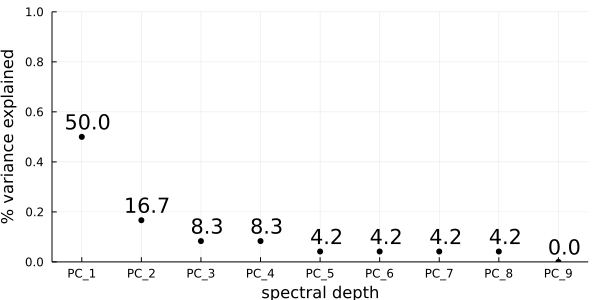

In [9]:
plot(markersize=5, legend=:none, ylims=(0,1), xticks=(1:9, ["PC_$i" for i in 1:9]), xlims=(.5,9.5), size=(600,300),
    ylabel="% variance explained",
    xlabel="spectral depth")
scatter!((usv.S.^2)/sum(usv.S.^2),  c=:black)
annotate!((1:length(usv.S)) .+ .1 , (usv.S.^2)/sum(usv.S.^2).+.06, round.((usv.S.^2)/sum(usv.S.^2)*100, digits=1))

In [10]:
savefig(joinpath(pdir, "fractionalvarianceof18x9.pdf"))

## MI CDF

In [26]:
F0 = repeat([1], 18)
F1 = vcat(repeat([1], 9), repeat([2], 9));
F2 = vcat(repeat(collect(1:6), 1, 3)'...);
F3 = collect(1:18);

In [27]:
pairwise(Euclidean(), usv.U')

18×18 Matrix{Float64}:
 0.0       0.831798  0.743777  0.862929  …  0.818389  1.00132   1.02766
 0.831798  0.0       1.2138    1.04981      1.1951    1.0437    1.0635
 0.743777  1.2138    0.0       1.24889      1.08204   1.08369   1.07922
 0.862929  1.04981   1.24889   0.0          0.882498  1.05322   1.0009
 1.00356   0.964998  1.14289   0.609328     1.00976   0.827706  1.01154
 1.02697   1.30124   0.84967   0.772369  …  1.01575   1.01652   0.942419
 0.822467  1.11798   1.14997   0.836173     0.830993  1.01122   1.00946
 1.02476   1.15909   1.02958   1.11945      1.01406   0.834539  1.10103
 1.03197   1.05749   1.09111   1.0003       1.04709   1.04582   0.816696
 0.818691  1.19745   1.08041   0.88413      0.816508  1.00004   1.04309
 1.00058   1.03313   1.0904    1.04797   …  1.00023   0.816676  1.03608
 1.02478   1.06793   1.07087   1.00153      1.03836   1.0372    0.816597
 0.816502  1.16705   1.10326   0.863861     0.818199  1.00117   1.02832
 1.00648   1.08388   1.0611    1.07456  

In [71]:
F1MI = map([1:1, 2:2, 3:4, 5:8]) do i 
    SPI.empiricalMI(pairwise(WeightedEuclidean(usv.S[i]), usv.U[:, i]')[:], (F1 .== F1')[:])
end
F2MI = map([1:1, 2:2, 3:4, 5:8]) do i 
    SPI.empiricalMI(pairwise(WeightedEuclidean(usv.S[i]), usv.U[:, i]')[:], (F2 .== F2')[:])
end
F0MI = map([1:1, 2:2, 3:4, 5:8]) do i 
    SPI.empiricalMI(pairwise(WeightedEuclidean(usv.S[i]), usv.U[:, i]')[:], (F0 .== F0')[:])
end
F3MI = map([1:1, 2:2, 3:4, 5:8]) do i 
    SPI.empiricalMI(pairwise(WeightedEuclidean(usv.S[i]), usv.U[:, i]')[:], (F3 .== F3')[:])
end;

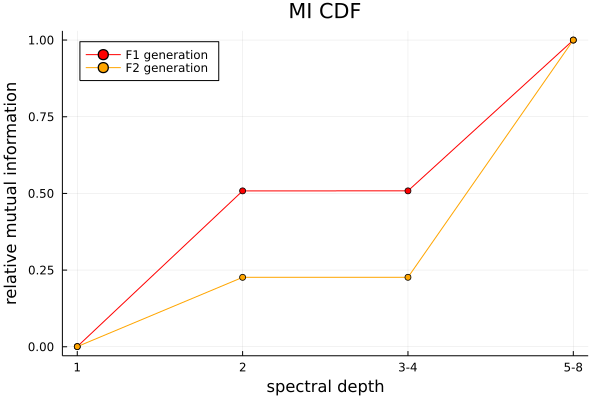

In [75]:
plot(title="MI CDF", 
    ylabel="relative mutual information", 
    xlabel="spectral depth",
    legend=:topleft,
    xticks=(1:4, ["1", "2", "3-4", "5-8"]),

    )
plot!(mapslices(scaledcumsum, hcat(F1MI, F2MI), dims=1),
    marker=true,
    c=[:red :orange],
    label=["F1 generation" "F2 generation"])

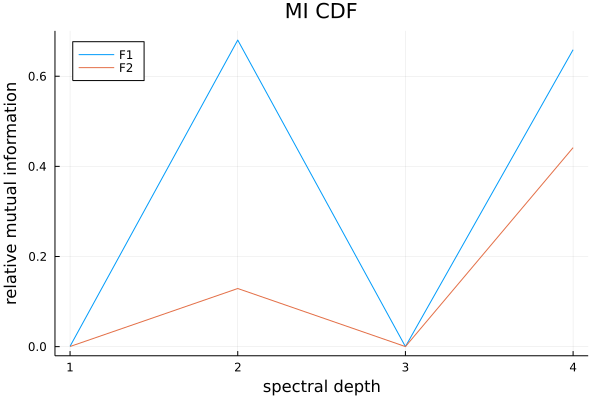

In [77]:
plot(title="MI CDF", 
    ylabel="relative mutual information", 
    xlabel="spectral depth",
    legend=:topleft,
    # xticks=1:9
    )
plot!(hcat(F1MI, F2MI),
    label=["F1" "F2"])

# Plot paired distances

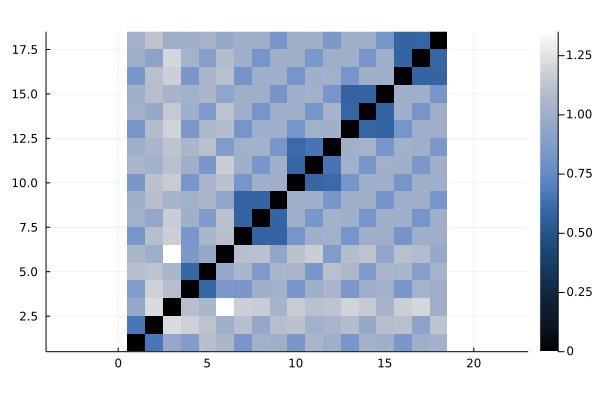

In [32]:
# basic Euclidean distance
Dij_euclidean = Distances.pairwise(Euclidean(), usv.U')
heatmap(Dij_euclidean, c=:oslo, ratio=1)

In [33]:
savefig(joinpath(pdir, "basiceuclideandistanceofUmatrix.pdf"))

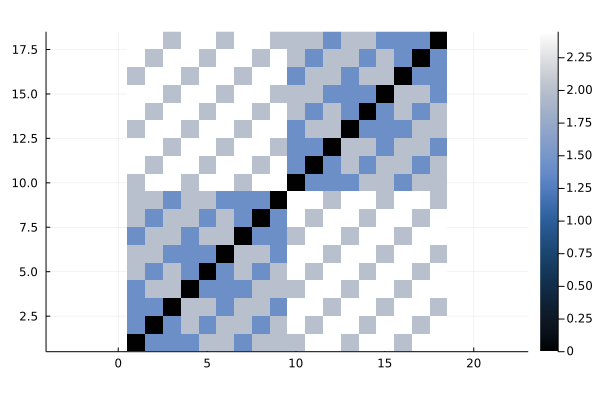

In [29]:
# basic Euclidean distance
Dij_euclidean = Distances.pairwise(Euclidean(), M')
heatmap(Dij_euclidean, c=:oslo, ratio=1)

In [30]:
savefig(joinpath(pdir, "euclidean_distance_matrix.pdf"))

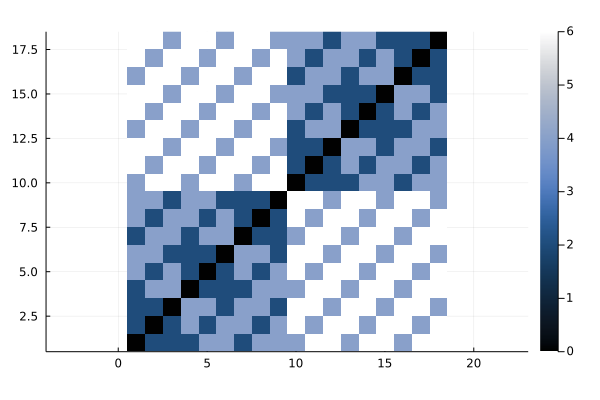

In [27]:
# basic Euclidean distance
Dij_euclidean = Distances.pairwise(Hamming(), M')
heatmap(Dij_euclidean, c=:oslo, ratio=1)

In [28]:
savefig(joinpath(pdir, "hamming_distance_matrix.pdf"))

In [17]:
using SPI

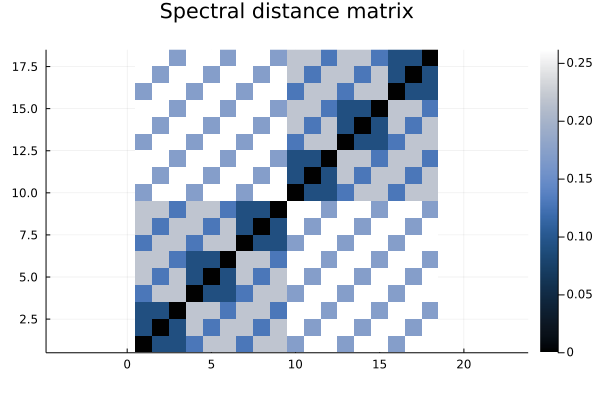

In [25]:
Dij = calc_spi_mtx(usv.U, usv.S, getintervals(usv.S)) ./ 9
heatmap(Dij, ratio=1, c=:oslo, title="Spectral distance matrix")

In [26]:
savefig(joinpath(pdir, "spectral_distance_matrix.pdf"))

plot spectral divergences

In [13]:
# using SCALES
# spires = SCALES.pairwise(SCALES.SpectralResiduals(), usv.U') 

spires = calc_spi_trace(usv, groups=[i:i for i in 1:length(usv.S)])
spires = mapslices(cumsum, spires, dims=1)

9×153 Matrix{Float64}:
 1.0198e-15   4.07922e-16  2.03961e-16  …  5.43896e-16  3.39935e-16
 1.17478e-15  5.1124e-16   5.65574e-16     6.98873e-16  5.9823e-16
 0.451801     0.903602     6.52453e-16     0.903602     0.451801
 1.23434      0.903602     9.56532e-16     0.903602     1.23434
 1.23434      0.903602     0.169202        0.903602     1.23434
 1.23434      0.903602     0.49861      …  0.903602     1.23434
 1.23434      0.903602     1.49892         0.903602     1.23434
 1.23434      0.903602     1.62907         0.903602     1.23434
 1.23434      0.903602     1.62907         0.903602     1.23434

In [14]:
kron([1 0; 0 1],[1 0; 0 1], [0 0; 1 0])

8×8 Matrix{Int64}:
 0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0

In [15]:
heatmap(F1mask, ticks=1:18, ratio=1, yflip=true)

UndefVarError: UndefVarError: F1mask not defined

In [16]:
## Plot SPI cumsum pairs by generation
trilmask = tril(trues(size(usv.U,1), size(usv.U,1)), -1)
F1mask = Bool.(kron([0 0; 1 0], [1 1 1; 1 1 1; 1 1 1], [1 1 1; 1 1 1; 1 1 1]))
F2mask = Bool.(kron([1 0; 0 1], [0 0 0; 1 0 0; 1 1 0], [1 1 1; 1 1 1; 1 1 1]))
F3mask = Bool.(kron([1 0; 0 1], [1 0 0; 0 1 0; 0 0 1], [0 0 0; 1 0 0; 1 1 0]));

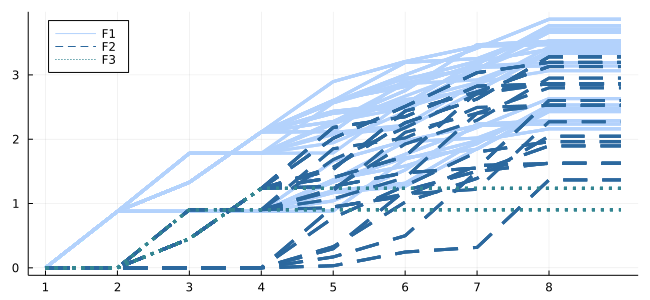

In [17]:

plot([0 0 0], 
    label=["F1" "F2" "F3"], 
    c=generationcols,
    linestyle=[:solid :dash :dot],
    size=(650, 300),
    legend=:topleft,
    xticks=1:8)
plot!(spires[:, F1mask[trilmask]],linewidth=3, c=generationcols[1],linestyle=:solid, label="")
plot!(spires[:, F2mask[trilmask]],linewidth=3, c=generationcols[2],linestyle=:dash,  label="")
plot!(spires[:, F3mask[trilmask]],linewidth=3, c=generationcols[3],linestyle=:dot,   label="")

In [18]:
savefig(joinpath(pdir, "spectral_residuals_trace_18x9.pdf"))

In [19]:
partitioneddists = calc_spi_trace(usv.U, usv.S, [1:1, 2:2, 3:4, 5:8])
cumsumpdists = cumsum(partitioneddists, dims=1);

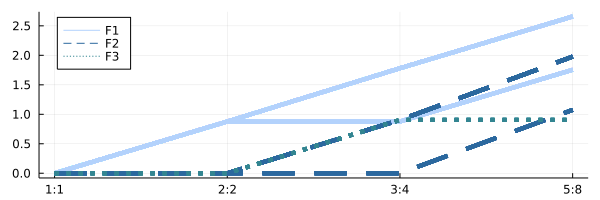

In [20]:
plot([0 0 0], 
    label=["F1" "F2" "F3"], 
    c=generationcols,
    linestyle=[:solid :dash :dot],
    legend=:topleft,
    linewidth=5,
    size=(600, 200),
    xticks=(1:4, ["1:1", "2:2", "3:4", "5:8"]))
plot!(cumsumpdists[:, F1mask[trilmask]], linewidth=4, c=generationcols[1],linestyle=:solid, label="")
plot!(cumsumpdists[:, F2mask[trilmask]], linewidth=4, c=generationcols[2],linestyle=:dash,  label="")
plot!(cumsumpdists[:, F3mask[trilmask]], linewidth=4, c=generationcols[3],linestyle=:dot,   label="")

In [21]:
savefig(joinpath(pdir, "partitioned_spectral_residuals_trace_18x9.pdf"))

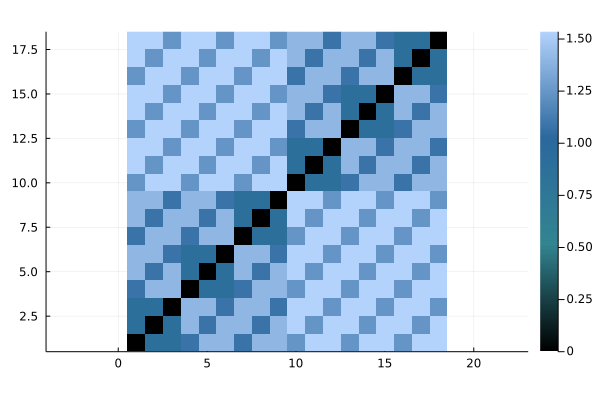

In [22]:
colors = [:black, reverse(generationcols)...]
heatmap(Distances.pairwise(WeightedEuclidean(usv.S), usv.U'), c=colors, ratio=1)

In [23]:
savefig(joinpath(pdir, "basic_weighted_euclideandistance_heatmap.pdf"))

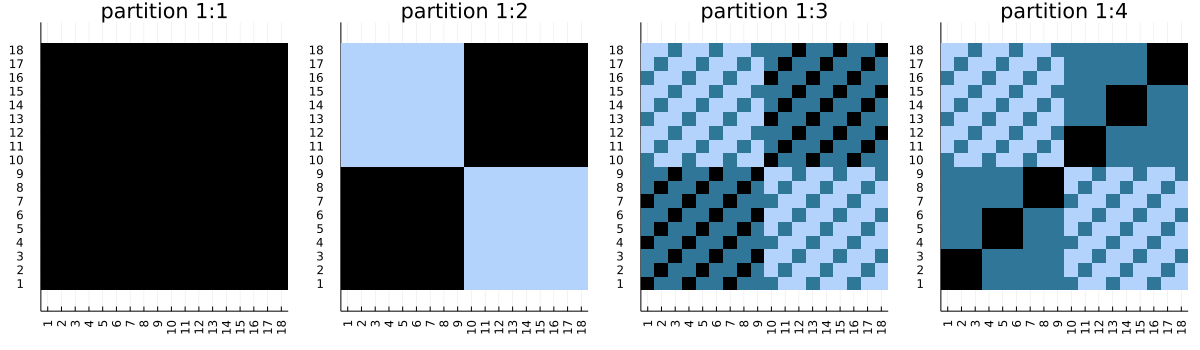

In [25]:
## Plot partitioned distance matrix (Partitioned Weighted Euclidean)
plot(layout=grid(1,4), size=(1200, 350), ratio=1, ticks=1:18,xrotation=90, colorbar=:none, bottommargin=5Plots.Measures.mm)
heatmap!(trunc.(SPI.reshape_pairstodistancematrix(cumsumpdists[1,:]), digits=13), sp=1, c=colors, title="partition 1:1")
heatmap!(SPI.reshape_pairstodistancematrix(cumsumpdists[2,:]),sp=2, c=colors,title="partition 1:2")
heatmap!(SPI.reshape_pairstodistancematrix(cumsumpdists[3,:]),sp=3, c=colors,title="partition 1:3")
heatmap!(trunc.(Int,SPI.reshape_pairstodistancematrix(cumsumpdists[4,:])),sp=4, c=colors,title="partition 1:4")

In [26]:
savefig(joinpath(pdir, "SPIdistancematrices_cumulativepartitions.pdf"))

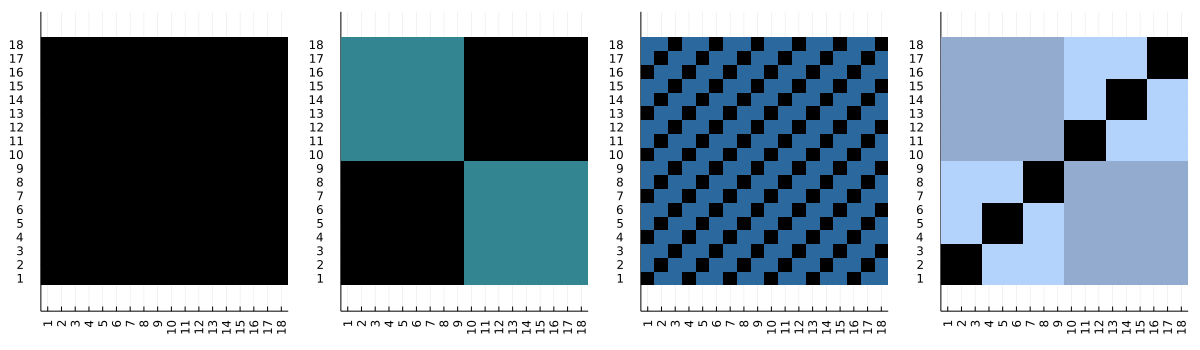

In [27]:

SPI.reshape_pairstodistancematrix(cumsumpdists[4,:])
## Plot partitioned distance matrix (SPI)
plot(layout=grid(1,4), size=(1200, 350), ratio=1, ticks=1:18, xrotation=90, colorbar=:none, bottommargin=5Plots.Measures.mm)
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[1,:]),sp=1, c=:black)
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[2,:]),sp=2, c=[:black, colors[2]])
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[3,:]),sp=3, c=[:black, colors[3]])
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[4,:]),sp=4, c=[:black, colors[4]])

In [28]:
savefig(joinpath(pdir, "SPIdistancematrices_individualpartitions.pdf"))

In [29]:
gpairdist

UndefVarError: UndefVarError: gpairdist not defined

In [30]:
loadings

UndefVarError: UndefVarError: loadings not defined

In [31]:
loadings

UndefVarError: UndefVarError: loadings not defined

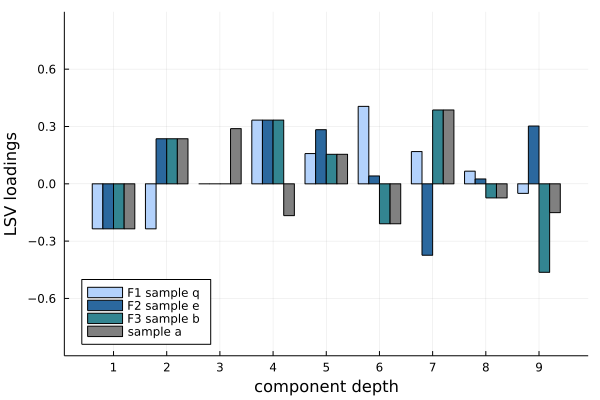

In [32]:
loadings = hcat(
    usv.U[1, 1:9],
    usv.U[2, 1:9],
    usv.U[5, 1:9],
    usv.U[17, 1:9],
)
gpairdist = repeat(["sample a", "F3 sample b", "F2 sample e", "F1 sample q"], inner = 9)
gcolors = [generationcols... :grey]
plot(ylabel="LSV loadings", xlabel="component depth", xticks=1:9, ylims=(-.9, .9))
groupedbar!(loadings[:], group=gpairdist, legend=:bottomleft, c=gcolors)
# (usv.S[2:end].^2)/sum(usv.S[2:end].^2).*100

In [33]:
savefig(joinpath(pdir, "LSVloading_by_componentdepth_18x9data.pdf"))

In [34]:
# # Partitioned Co-Variance
# M
# heatmap(cor(M),c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1)
# heatmap(cov(M),c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1)
# covVF = (usv.V * (diagm(usv.S).^2) * usv.Vt)/7
# heatmap(covVF, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# covVF = M'M/7
# heatmap(covVF, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1,clim=(-1,1))
# covVF1 = (usv.V[:, 2:2] * (diagm(usv.S[2:2]).^2) * usv.Vt[2:2, :])
# heatmap(covVF1, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# grp = 3:4
# covVF2 = (usv.V[:, grp] * (diagm(usv.S[grp]).^2) * usv.Vt[grp, :])
# heatmap(covVF2, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1,clim=(-1,1))
# grp = 5:8
# covVF3 = (usv.V[:, grp] * (diagm(usv.S[grp]).^2) * usv.Vt[grp, :])
# heatmap(covVF3, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# covVF3 = usv.V[:, 5:8] * diagm(usv.S[5:8]) * usv.Vt[5:8, :]
# heatmap(covVF3, c=[:blue, :black, :darkorange])